## MNIST Neural Network Project

## 03/06/2025

## William Lorenzo

#### Unloading Libraries:

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

#### Preparing `MNIST` Data:

The MNIST dataset contains 70,000 grayscale images of handwritten digits (0-9).
    
    - Split into 60,000 images for training and 10,000 images for testing
    
    - Normalize images to a range of [0, 1] by dividing each pixel by 255

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

#### Checking Size & Shape:

Examining how many images are in the training and testing datasets.

In [3]:
print(f"Number of images in the training dataset: {train_images.shape[0]}")
print(f"Number of images in the testing dataset: {test_images.shape[0]}")
print(f"Shape of the images in the training dataset: {train_images[0].shape}")

Number of images in the training dataset: 60000
Number of images in the testing dataset: 10000
Shape of the images in the training dataset: (28, 28)


#### Visualizing the First 10 Images:

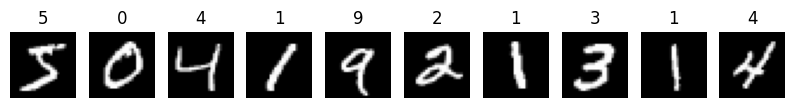

In [4]:
fig, axes = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10):
    axes[i].imshow(train_images[i].reshape(28, 28), cmap = "gray")
    axes[i].set_title(train_labels[i])
    axes[i].axis('off')
plt.show()

#### Building Neural Network:

- Flatten Layer: Converts the 28x28 image into 1D array of 784 outputs
- Hidden Layer 1: 128 neurons with ReLU activation
- Hidden Layer 2: 64 neurons with ReLU activation
- Output Layer: 10 neurons with softmax activation to predict a digit (0-9)

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#### Compile the Model:

- Before training the model, the model must be compiled
- Optimizer: Adam (efficient optimizer for neural networks)
- Loss Function: Sparse Categorical Crossentropy (hence, labels are integers)
- Metrics: Accuracy (measuring how well the model performs)

In [6]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

#### Training the Model:

- Training it for 5 epochs, meaning the model will go through the entire training data 5 times
- Output will show the accuracy and loss after each epoch

In [7]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8816 - loss: 0.4097
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9681 - loss: 0.1052
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9787 - loss: 0.0690
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9844 - loss: 0.0501
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9876 - loss: 0.0403


#### Predicting on Single Image:

- Testing the model by passing in a single image from the test set
- Utilizing the first image and integrating the model to predict what number it sees
- Visualizing image and class probabilities

In [8]:
image, label = test_images[0], test_labels[0]
probabilities = model.predict(image.reshape(1, 28, 28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


#### Visualizing the Prediction:

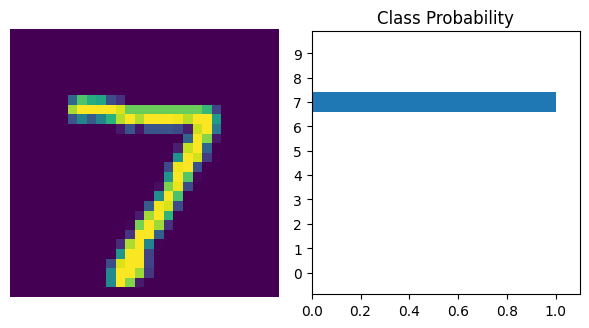

In [9]:
def view_classify(image, probabilities):
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(image)
    ax1.axis('off')
    ax2.barh(np.arange(10), probabilities)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

view_classify(image, probabilities[0])

#### Evaluating the Model on the Test Data:

- Testing the model on the full test dataset (10,000 images)
- Outputs the loss and accuracy
- The higher the accuracy, the better the model performed

In [10]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Accuracy of the neural network on the {test_images.shape[0]} test images: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.9762 - loss: 0.0803
Accuracy of the neural network on the 10000 test images: 97.91%
